In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

#Q1
print(df.head(10))
df.describe()

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland


,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [16]:
#Q2
# Q2: Handle Missing Values
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing values
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
print('\n')



Missing values in each column:
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64




In [18]:
#Q3
date_col= pd.DatetimeIndex(df['dt'])
df['Year']= date_col.year
df['Month']= date_col.month
df['Day']= date_col.day
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Day
0,1743-11-01,4.384,2.294,Åland,1743,11,1
5,1744-04-01,1.530,4.680,Åland,1744,4,1
6,1744-05-01,6.702,1.789,Åland,1744,5,1
7,1744-06-01,11.609,1.577,Åland,1744,6,1
8,1744-07-01,15.342,1.410,Åland,1744,7,1
...,...,...,...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe,2013,4,1
577457,2013-05-01,19.059,1.022,Zimbabwe,2013,5,1
577458,2013-06-01,17.613,0.473,Zimbabwe,2013,6,1
577459,2013-07-01,17.000,0.453,Zimbabwe,2013,7,1


Dataset size before filtering: 577462
Dataset size after filtering: 473332




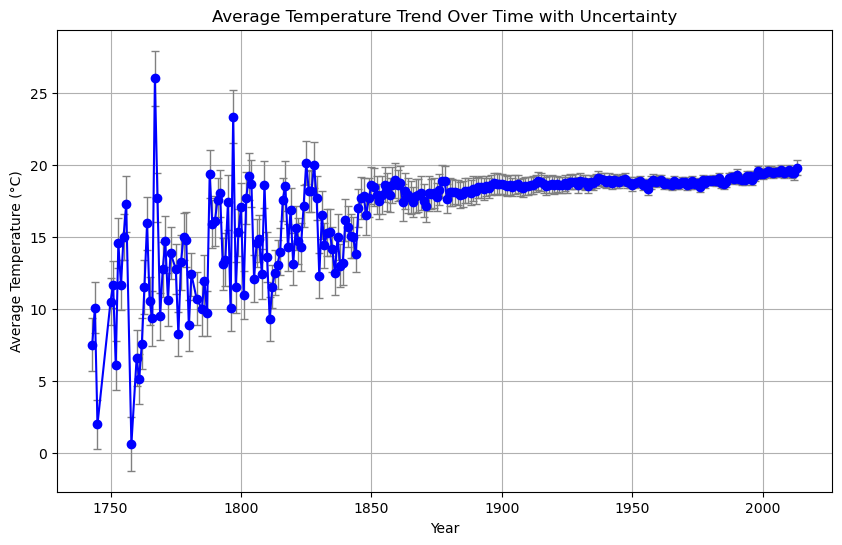

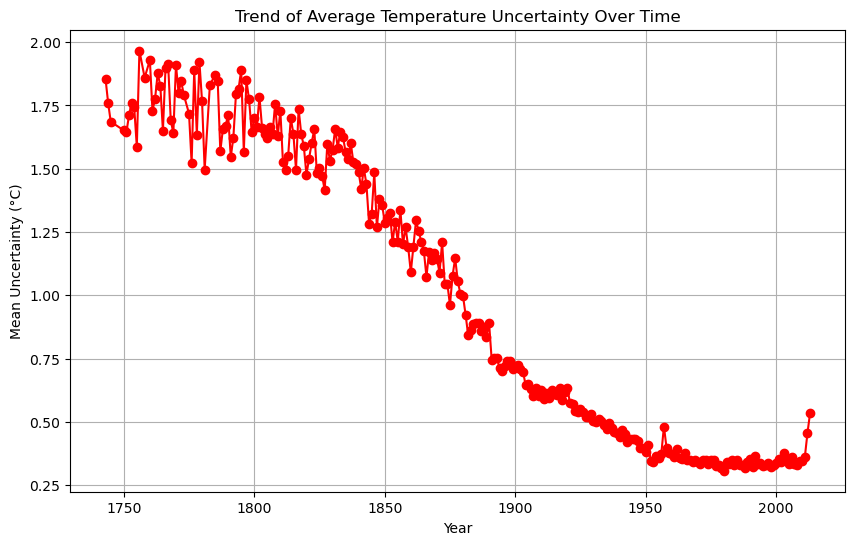



Years with high uncertainty:
Empty DataFrame
Columns: [Year, MeanTemperature, MeanUncertainty]
Index: []


In [52]:
# Q4: Filter Data Based on Uncertainty
# Dataset size before filtering
initial_size = df.shape[0]
threshold = 2.0
# Filter out data points with uncertainty above this threshold
filtered_data = df[df['AverageTemperatureUncertainty'] <= threshold].copy()

# Dataset size after filtering
final_size = filtered_data.shape[0]
print(f"Dataset size before filtering: {initial_size}")
print(f"Dataset size after filtering: {final_size}")

print('\n')
# Q4: Visualize Temperature Trend with Uncertainty
#Convert 'dt' column to datetime format
filtered_data['Year'] = pd.to_datetime(filtered_data['dt']).dt.year 

#Group data by Year
yearly_data = filtered_data.groupby('Year').agg(MeanTemperature=('AverageTemperature', 'mean'),MeanUncertainty=('AverageTemperatureUncertainty', 'mean')).reset_index()

# Plot average temperature trend with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(
    yearly_data['Year'],
    yearly_data['MeanTemperature'],
    yerr=yearly_data['MeanUncertainty'],
    fmt='-o',
    color='blue',
    ecolor='gray',
    elinewidth=1,
    capsize=3,
    label='Average Temperature'
)
plt.title('Average Temperature Trend Over Time with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid()
plt.show()

print('\n')
# Analyze Trends in Uncertainty
# Plot trend of uncertainty over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['MeanUncertainty'], '-o', color='red')
plt.title('Trend of Average Temperature Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Uncertainty (°C)')
plt.grid()
plt.show()

print('\n')
# Identify High-Uncertainty and Inconsistent Periods
high_uncertainty_years = yearly_data[yearly_data['MeanUncertainty'] > threshold]
print("Years with high uncertainty:")
print(high_uncertainty_years)


In [54]:
#Q5
filtered_data.to_csv('cleaned_temperature.csv', index=False)

Insights on How Uncertainty Affects Data Consistency and Analysis

1. Definition of Uncertainty in the tasaset   - t The uncertainty in this dataset (AverageTemperatureUncertainty) measures the chance of mistake in temperature observations. It represents t           e accuracy of the recorded data point
2. Influence on Data and Trend-   -  
Inconsistency: High uncertainty generates noise, concealing actual patterns or creating false ones. It makes comparisons difficult, particularly        between older and more reliable recent dat.. -   -  
Bias: Filtering out ambiguous data increases quality but may exclude crucial information, lowering historical or geographical coverage3
3. Practical Implions:-   -  s.
Better insights: Filtering out questionable data results in more robust analysis and reliable   -   -  ds.
Trade-offs: While filtered data is more reliable, it may exclude places or times with scarcenreadi4gs.
4. Explaining Trends it:t   :
   -  ainty
Declines over time: Better technology and approaches have reduceart   -   -  ainty.
Temporary Spikes: Natural occurrences or historical gaps can still prodlations.u6e oscil
5. Reducing Uncertainties:
   - Check data against trustworthy sources.
   - In the analysis, use uncertainty as a weight.
   - Report uncertainty openly to give context.
   - Effective uncertainty management allows analysts to balance coverage and data quality while producing trustworthy ions.a.s.